# Importation des librairies

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

# Fonction de traitement des images

In [4]:

def copy_images(images_folder_path, output_folder_path):
    # Get the list of image files in the folder
    image_files = [f for f in os.listdir(images_folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.JPG'))]
    # Sort the image files based on their names
    image_files.sort()
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(images_folder_path, image_file)
        new_image_path = os.path.join(output_folder_path, image_file)
        os.system(f"cp {image_path} {new_image_path}")
    print(f"Images copied successfully and saved in: {output_folder_path}")
def create_video(images_folder, output_video_path, frame_rate=25):
    # Get the list of image files in the folder
    image_files = [f for f in os.listdir(images_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.JPG'))]

    # Sort the image files based on their names
    image_files.sort()

    # Get the first image to determine the video dimensions
    first_image = cv2.imread(os.path.join(images_folder, image_files[0]))
    height, width, _ = first_image.shape

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change the codec if needed
    video_writer = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))

    for image_file in image_files:
        # Read each image and write it to the video
        image_path = os.path.join(images_folder, image_file)
        frame = cv2.imread(image_path)
        video_writer.write(frame)

    # Release the VideoWriter object
    video_writer.release()

    print(f"Video created successfully at: {output_video_path}")

def to_black_and_white(images_folder_path, output_folder_path):
    # Get the list of image files in the folder
    image_files = [f for f in os.listdir(images_folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.JPG'))]
    # Sort the image files based on their names
    image_files.sort()
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(images_folder_path, image_file)
        frame = cv2.imread(image_path)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        new_image_path = os.path.join(output_folder_path, image_file)
        cv2.imwrite(new_image_path, gray_frame)
    print(f"Images converted to black and white successfully and saved in: {output_folder_path}")

def crop_bottom_images(images_folder_path, output_folder_path, bottom_pixels):

    # Get the list of image files in the folder
    image_files = [f for f in os.listdir(images_folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.JPG'))]
    # Sort the image files based on their names
    image_files.sort()

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(images_folder_path, image_file)
        frame = cv2.imread(image_path)

        if frame is None:
            print(f"Error reading image: {image_path}")
            continue

        # Get the height of the image
        height, _ = frame.shape[:2]

        # Crop the bottom of the image
        cropped_frame = frame[:-bottom_pixels, :]

        new_image_path = os.path.join(output_folder_path, image_file)
        cv2.imwrite(new_image_path, cropped_frame)

    print(f"Images cropped successfully and saved in: {output_folder_path}")

def adjust_brightness(images_folder_path, output_folder_path, brightness, left=1200, right=2500, bottom=3500, top=2500):
    # Get the list of image files in the folder
    image_files = [f for f in os.listdir(images_folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.JPG'))]
    # Sort the image files based on their names
    image_files.sort()
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(images_folder_path, image_file)
        frame = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        frame_crop = frame[top:bottom, left:right]
        mean_crop = np.mean(frame_crop)
        frame = cv2.multiply(frame, brightness/mean_crop)
        new_image_path = os.path.join(output_folder_path, image_file)
        cv2.imwrite(new_image_path, frame)
    frame[top:bottom, left:right] = 0
    plt.imshow(frame, cmap='gray')
    print(f"Images brightness adjusted successfully and saved in: {output_folder_path}")


Images copied successfully and saved in: images-traitees
Images converted to black and white successfully and saved in: images-traitees
Images cropped successfully and saved in: images-traitees
Images brightness adjusted successfully and saved in: images-traitees


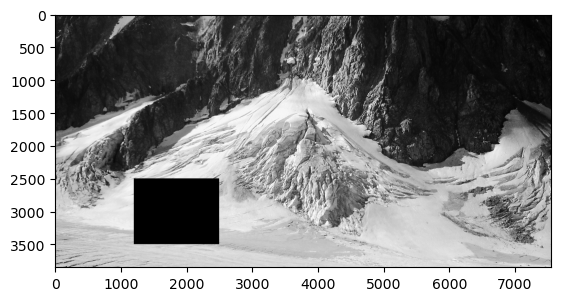

In [8]:
copy_images("images-source", "images-traitees")
to_black_and_white("images-traitees", "images-traitees")
crop_bottom_images("images-traitees", "images-traitees", 400)
adjust_brightness("images-traitees", "images-traitees", 200)